Feature importances (related to Information Gain):
Car: 0.5000
Age: 0.5000


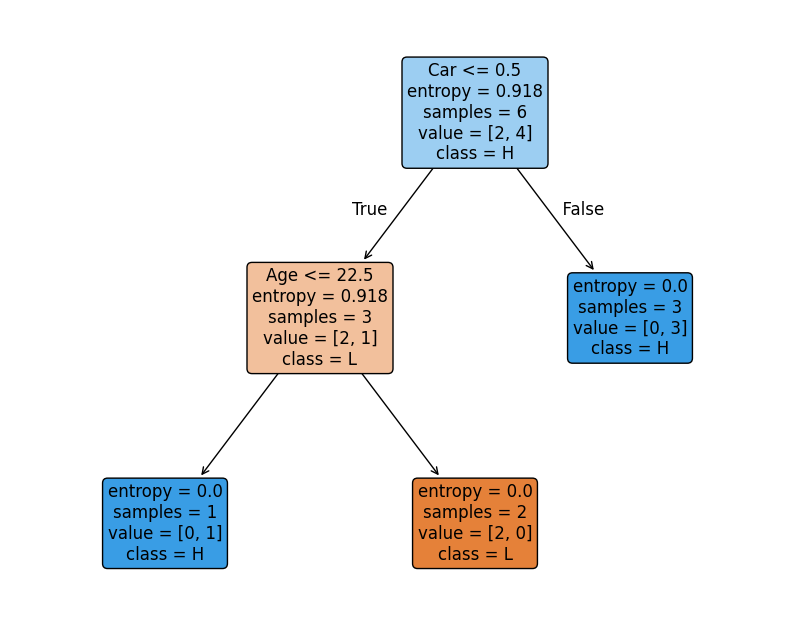


Decision Tree Structure:
DecisionTreeClassifier(criterion='entropy')


In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Given dataset
data = {
    'Car': ['Sports', 'Vintage', 'Sports', 'SUV', 'Sports', 'SUV'],
    'Age': [25, 20, 25, 45, 20, 25],
    'Risk': ['L', 'H', 'L', 'H', 'H', 'H']
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Encoding categorical data into numeric values
# We need to convert categorical variables like 'Car' and 'Risk' into numeric values for scikit-learn.
df_encoded = df.copy()
df_encoded['Car'] = df_encoded['Car'].map({'Sports': 0, 'Vintage': 1, 'SUV': 2})
df_encoded['Risk'] = df_encoded['Risk'].map({'L': 0, 'H': 1})

# Features and target
X = df_encoded[['Car', 'Age']]  # Features
y = df_encoded['Risk']          # Target

# Initialize DecisionTreeClassifier with entropy criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Fit the model on the data
clf.fit(X, y)

# Print the Information Gain for each feature (this will be related to the feature importances)
print("Feature importances (related to Information Gain):")
print(f"Car: {clf.feature_importances_[0]:.4f}")
print(f"Age: {clf.feature_importances_[1]:.4f}")

# Visualizing the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=['Car', 'Age'], class_names=['L', 'H'], filled=True, rounded=True, fontsize=12)
plt.show()

# Display the decision tree structure
print("\nDecision Tree Structure:")
print(clf)


In [11]:
# Predict X7

# The sample to classify
X7 = {'Age': 27, 'Car': 'Vintage'}

# Encoding the 'Car' feature for the new sample (same as in the training data)
car_encoding = {'Sports': 0, 'Vintage': 1, 'SUV': 2}
X7_encoded = {'Age': X7['Age'], 'Car': car_encoding[X7['Car']]}

# Convert the sample into a DataFrame to make it compatible with the model
X7_df = pd.DataFrame([X7_encoded])

# Ensure that the columns are in the same order as during training
X7_df = X7_df[['Car', 'Age']]  # Order of features should match the training order

# Use the trained model to predict the class for the new sample
prediction = clf.predict(X7_df)

# Print the predicted class (0 = L, 1 = H)
predicted_class = 'L' if prediction[0] == 0 else 'H'
print(f"The predicted class for X7 is: {predicted_class}")


The predicted class for X7 is: H
